In [11]:
%reload_ext autoreload
%autoreload 2
from DOI_analysis_functions import *
from OMR_Fish import omrFish
import h5py

In [2]:
pd.set_option('display.max_columns', None)

### Data Folder for Lab Computer

In [19]:
data_folder = r"C:\Users\Naumann3\Data\DOI_minel\aloye_behavior\data"
exp_folder = "EK_6dpf_DOI_0ugml_20230206"

### Data Folder for Aloye's Personal Computer

In [7]:
# data_folder = "/Users/aoshotse/NAUMANN_LAB/data"
# exp_folder = "EK_7dpf_DOI_50ugml_20230214"

## For new experiments

In [20]:
# Set the folder directory to where the rig files are located
parent_folder = os.path.join(data_folder, exp_folder)

In [ ]:
create_newdf(parent_folder)

In [ ]:
create_newboutdf(parent_folder)

## Eliminate bad fish

In [ ]:
parent_folder = os.path.join(data_folder, exp_folder)

In [ ]:
# Read the exp dataframes
"""rewrite this code to look into experimental folder"""
lvl = 'exp'
conc = parent_folder[parent_folder.rfind('DOI')+4 : parent_folder.rfind('ugml')+4]
age = int(parent_folder[:parent_folder.rfind('dpf')][parent_folder[:parent_folder.rfind('dpf')].rfind('_')+1:])
df_path = os.path.join(parent_folder, parent_folder[parent_folder.rfind('\\')+1:] + '_finaldf.h5')
df = pd.read_hdf(df_path)
bout_path = os.path.join(parent_folder, parent_folder[parent_folder.rfind('\\')+1:] + '_finalboutdf.h5')
boutdf = pd.read_hdf(bout_path)

In [ ]:
df

In [ ]:
boutcount_df = measurepertime(boutdf, measure='boutcount', time='min')
boutcount_df

In [ ]:
usable_fish = barplot_perfish(parent_folder, boutcount_df, level=lvl)
print(usable_fish)

if len(usable_fish) > 0:
    for fish in usable_fish:
        fish_instance = omrFish(exp_folder, fish[0], fish[1])
        fish_instance.load_fish_to_dataframe("master_fish.csv")

In [ ]:
lineplot_perfish(parent_folder, boutdf, level=lvl, measure='distance')

In [ ]:
lineplot_perfish(parent_folder, boutdf, level=lvl, measure='dist_from_center')

In [ ]:
histplot(parent_folder, boutdf, level=lvl, measure='bout_duration')

In [ ]:
histplot_perfish(parent_folder, boutdf, level=lvl, measure='bout_angle')

In [ ]:
scatterplot_perfish(parent_folder, df, level=lvl, stim_name='right')

In [ ]:
scatterplot_perfish(parent_folder, df, level=lvl, stim_name='left')

# DataFrame Analysis

In [21]:
final_df = pd.read_csv('master_fish.csv')

## DOI vs EggH20 (all)

In [22]:
concentrations = list(set(final_df['concentration'].tolist()))

# final_df = final_df[(final_df["active"] == "TRUE")]


for _conc in concentrations:
    fish_list = final_df[final_df['concentration'] == _conc].id.tolist()
    create_concdf(data_folder, _conc, fish_list)
    print('concdf created for ' + str(_conc))

concdf created for 0
concdf created for 50


In [23]:
eggH20_final_path = os.path.join(data_folder, '0_DOI_selected_finaldf.h5')
eggH20_final_df = pd.read_hdf(eggH20_final_path)
eggH20_final_df

,f0_x,f0_vx,f0_y,f0_vy,f0_theta,f0_vtheta,f0_theta_00,f0_theta_01,f0_theta_02,f0_theta_03,biggest_area,t,stim_index,motion,stim_type,angle,stim_name,stat_time,duration,fish_id,bout,stim_time,condition
0,601.800720,0.009628,227.295609,0.028199,-4.284544,0.000810,0.009428,0.012354,0.003635,-0.004843,1525.0,0.001994,0.0,1.0,s,0,habituation,0,300.0,458,NaN,0.000000,baseline
1,601.824280,0.016356,227.321671,0.027171,-4.284530,0.000426,0.010143,0.013758,0.009372,0.018241,1725.0,0.008976,0.0,1.0,s,0,habituation,0,300.0,458,NaN,0.006670,baseline
2,601.952271,0.070109,227.194901,-0.047006,-4.281862,0.001507,0.006180,0.009827,0.001003,-0.007261,1750.0,0.016232,0.0,1.0,s,0,habituation,0,300.0,458,NaN,0.013341,baseline
3,602.000793,0.059721,227.084930,-0.077346,-4.282141,0.000646,0.006468,0.007827,0.002672,-0.008647,1775.0,0.022216,0.0,1.0,s,0,habituation,0,300.0,458,NaN,0.020011,baseline
4,602.160706,0.107966,226.899933,-0.129218,-4.278861,0.001915,0.002667,0.019176,-0.009877,-0.009958,1775.0,0.037175,0.0,1.0,s,0,habituation,0,300.0,458,NaN,0.026681,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534547,559.558777,-0.085967,17.028927,0.005854,3.072774,0.006223,-0.043956,-0.058466,-0.085428,-0.104081,6750.0,3965.197998,120.0,1.0,s,0,backward,3,33.0,456,3271.0,32.950763,drugtreated
2534548,562.020508,0.747161,16.827620,-0.061935,3.067444,0.002442,-0.020271,-0.048472,-0.070447,-0.093636,6825.0,3965.205811,120.0,1.0,s,0,backward,3,33.0,456,3271.0,32.960509,drugtreated
2534549,560.491028,-0.364479,16.958109,0.032068,3.072544,0.003741,-0.038602,-0.059358,-0.081387,-0.101165,4275.0,3965.212891,120.0,1.0,s,0,backward,3,33.0,456,3271.0,32.970254,drugtreated
2534550,562.115845,0.596795,16.811039,-0.054534,3.071271,0.001317,-0.018213,-0.060921,-0.068814,-0.103003,5425.0,3965.219727,120.0,1.0,s,0,backward,3,33.0,456,3271.0,32.980000,drugtreated


In [24]:
eggH20_finalbout_path = os.path.join(data_folder, '0_DOI_selected_finalboutdf.h5')
eggH20_finalbout_df = pd.read_hdf(eggH20_finalbout_path)
eggH20_finalbout_df

,concentration,age,fish_id,condition,stim_name,stim_index,bout,distance,dist_from_center,in_center,bout_angle,bout_duration,bout_start,cum_bout_start,timebin_ind,stim_duration,stat_time
0,0ugml,6,458,baseline,habituation,0.0,0.0,2.487540,383.026962,True,-20.743476,0.320172,66.435757,66.435757,2.0,300.0,0
1,0ugml,6,458,baseline,habituation,0.0,1.0,1.549886,381.689744,True,-9.373096,0.326843,67.362922,67.362922,2.0,300.0,0
2,0ugml,6,458,baseline,habituation,0.0,2.0,11.561707,375.399880,True,43.162725,0.320172,70.331187,70.331187,2.0,300.0,0
3,0ugml,6,458,baseline,habituation,0.0,3.0,12.891996,378.005368,True,18.492969,0.353524,72.532371,72.532371,2.0,300.0,0
4,0ugml,6,458,baseline,habituation,0.0,4.0,11.037949,378.271712,True,3.710432,0.386875,73.172716,73.172716,2.0,300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10547,0ugml,7,456,drugtreated,backward,120.0,3267.0,0.887351,592.962905,False,1.769169,0.565260,28.828263,3369.828263,57.0,33.0,3
10548,0ugml,7,456,drugtreated,backward,120.0,3268.0,0.417603,592.968541,False,-0.238428,0.555514,29.403269,3370.403269,57.0,33.0,3
10549,0ugml,7,456,drugtreated,backward,120.0,3269.0,0.259996,592.947575,False,0.280666,0.448310,30.514297,3371.514297,57.0,33.0,3
10550,0ugml,7,456,drugtreated,backward,120.0,3270.0,0.058725,592.946360,False,2.015862,0.448310,31.791005,3372.791005,57.0,33.0,3


In [25]:
DOI_final_path = os.path.join(data_folder, '50_DOI_selected_finaldf.h5')
DOI_final_df = pd.read_hdf(DOI_final_path)
DOI_final_df

,f0_x,f0_vx,f0_y,f0_vy,f0_theta,f0_vtheta,f0_theta_00,f0_theta_01,f0_theta_02,f0_theta_03,biggest_area,t,stim_index,motion,stim_type,angle,stim_name,stat_time,duration,fish_id,bout,stim_time,condition
0,840.411438,0.001179,571.535461,-0.006350,2.144195,0.000077,0.029897,0.052613,0.010126,-0.031355,1450.0,0.004986,0.0,1.0,s,0,habituation,0,300.0,443,NaN,0.000000,baseline
1,840.400818,-0.004502,571.457458,-0.040886,2.140397,-0.001790,0.034565,0.062188,0.008754,0.021785,1425.0,0.011969,0.0,1.0,s,0,habituation,0,300.0,443,NaN,0.006670,baseline
2,840.375977,-0.014298,571.498108,-0.001611,2.140054,-0.001093,0.033688,0.056123,0.008109,-0.003100,1425.0,0.018949,0.0,1.0,s,0,habituation,0,300.0,443,NaN,0.013340,baseline
3,840.409790,0.008873,571.448120,-0.024910,2.141398,0.000082,0.028162,0.055239,0.012335,-0.029695,1425.0,0.024933,0.0,1.0,s,0,habituation,0,300.0,443,NaN,0.020010,baseline
4,840.384277,-0.007682,571.453918,-0.010125,2.138723,-0.001247,0.036081,0.058008,0.013455,-0.005704,1450.0,0.033909,0.0,1.0,s,0,habituation,0,300.0,443,NaN,0.026680,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645624,727.262329,-2.689339,860.472351,-2.114408,0.706573,-0.113450,0.012379,0.039322,0.024237,-0.020252,900.0,3965.203857,120.0,1.0,s,0,backward,3,33.0,457,NaN,32.965262,drugtreated
4645625,723.875061,-3.025476,858.915649,-1.845687,0.622987,-0.099060,0.007238,0.005072,0.041823,0.144553,750.0,3965.210693,120.0,1.0,s,0,backward,3,33.0,457,NaN,32.971932,drugtreated
4645626,721.894409,-2.522243,856.121460,-2.302737,0.815058,0.041226,0.002318,-0.056955,-0.161479,-0.163867,725.0,3965.216797,120.0,1.0,s,0,backward,3,33.0,457,NaN,32.978603,drugtreated
4645627,721.821533,-1.342541,852.804260,-2.791562,1.086849,0.152327,0.024349,-0.065232,-0.044209,-0.072305,750.0,3965.222900,120.0,1.0,s,0,backward,3,33.0,457,NaN,32.985273,drugtreated


In [26]:
DOI_finalbout_path = os.path.join(data_folder, '50_DOI_selected_finalboutdf.h5')
DOI_finalbout_df = pd.read_hdf(DOI_finalbout_path)
DOI_finalbout_df

,concentration,age,fish_id,condition,stim_name,stim_index,bout,distance,dist_from_center,in_center,bout_angle,bout_duration,bout_start,cum_bout_start,timebin_ind,stim_duration,stat_time
0,50ugml,6,443,baseline,habituation,0.0,3.0,8.863261,120.845081,True,3.921410,0.300156,186.690092,186.690092,4.0,300.0,0
1,50ugml,6,443,baseline,habituation,0.0,4.0,11.851676,144.885713,True,-14.522738,0.353517,198.329458,198.329458,4.0,300.0,0
2,50ugml,6,443,baseline,habituation,0.0,5.0,16.006576,167.570186,True,-29.254773,0.353517,200.537269,200.537269,4.0,300.0,0
3,50ugml,6,443,baseline,habituation,0.0,6.0,16.200947,181.894131,True,27.890429,0.386867,202.224810,202.224810,4.0,300.0,0
4,50ugml,6,443,baseline,habituation,0.0,7.0,11.371815,191.486635,True,-35.631342,0.373527,202.911833,202.911833,4.0,300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14202,50ugml,7,457,drugtreated,backward,120.0,1391.0,69.766794,393.345082,True,60.503482,0.620350,27.582225,5381.582225,90.0,33.0,3
14203,50ugml,7,457,drugtreated,backward,120.0,1392.0,108.350498,393.369135,True,-59.469719,0.793781,28.829595,5382.829595,90.0,33.0,3
14204,50ugml,7,457,drugtreated,backward,120.0,1393.0,91.078448,447.115935,True,5.244738,0.693725,29.630047,5383.630047,90.0,33.0,3
14205,50ugml,7,457,drugtreated,backward,120.0,1394.0,63.977880,409.232110,True,77.922466,0.553646,30.670634,5384.670634,90.0,33.0,3


## Within concentration data analysis

In [ ]:
DOI_conc = '50ugml'

In [ ]:
# df_path = os.path.join(data_folder, f'{DOI_conc}_DOI_selected_finaldf.h5')
# df = pd.read_hdf(df_path)
bout_path = os.path.join(data_folder, f'{DOI_conc}_DOI_selected_finalboutdf.h5')
boutdf = pd.read_hdf(bout_path)

In [ ]:
lineplot_perconc(data_folder, boutdf, measure='distance')

In [ ]:
lineplot_perconc_baselinenorm(data_folder, boutdf, measure='distance')

In [ ]:
lineplot_perconc(data_folder, boutdf, measure='dist_from_center')

In [ ]:
lineplot_perconc_baselinenorm(data_folder, boutdf, measure='dist_from_center')

In [ ]:
histplot_perconc(data_folder, boutdf, 'bout_angle')

In [ ]:
histplot_perconc(data_folder, boutdf, 'bout_duration')

## Between concentration data analysis

In [27]:
create_alldf(data_folder)

In [28]:
alldf = pd.read_hdf(os.path.join(data_folder, 'alldf.h5'))

In [29]:
alldf

,concentration,age,fish_id,condition,stim_name,stim_index,bout,distance,dist_from_center,in_center,bout_angle,bout_duration,bout_start,cum_bout_start,timebin_ind,stim_duration,stat_time
0,0ugml,6,458,baseline,habituation,0.0,0.0,2.487540,383.026962,True,-20.743476,0.320172,66.435757,66.435757,2.0,300.0,0
1,0ugml,6,458,baseline,habituation,0.0,1.0,1.549886,381.689744,True,-9.373096,0.326843,67.362922,67.362922,2.0,300.0,0
2,0ugml,6,458,baseline,habituation,0.0,2.0,11.561707,375.399880,True,43.162725,0.320172,70.331187,70.331187,2.0,300.0,0
3,0ugml,6,458,baseline,habituation,0.0,3.0,12.891996,378.005368,True,18.492969,0.353524,72.532371,72.532371,2.0,300.0,0
4,0ugml,6,458,baseline,habituation,0.0,4.0,11.037949,378.271712,True,3.710432,0.386875,73.172716,73.172716,2.0,300.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,50ugml,7,457,drugtreated,backward,120.0,1391.0,69.766794,393.345082,True,60.503482,0.620350,27.582225,5381.582225,90.0,33.0,3
22671,50ugml,7,457,drugtreated,backward,120.0,1392.0,108.350498,393.369135,True,-59.469719,0.793781,28.829595,5382.829595,90.0,33.0,3
22672,50ugml,7,457,drugtreated,backward,120.0,1393.0,91.078448,447.115935,True,5.244738,0.693725,29.630047,5383.630047,90.0,33.0,3
22673,50ugml,7,457,drugtreated,backward,120.0,1394.0,63.977880,409.232110,True,77.922466,0.553646,30.670634,5384.670634,90.0,33.0,3


NameError: name 'habit_duration' is not defined

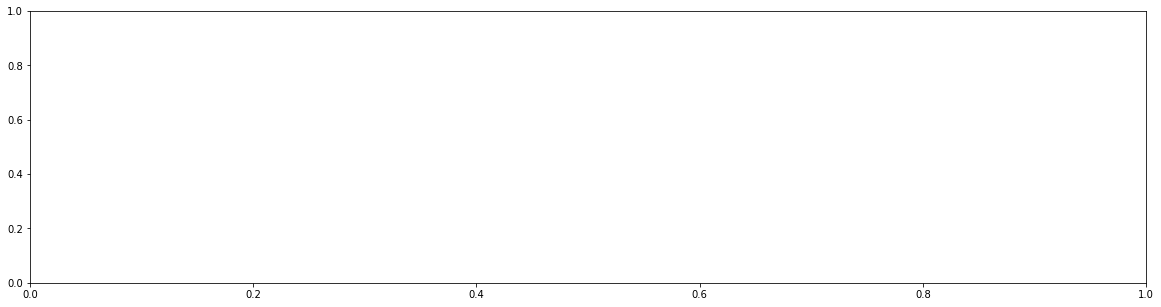

In [30]:
plot_all_distovertime(data_folder, alldf)

NameError: name 'habit_duration' is not defined

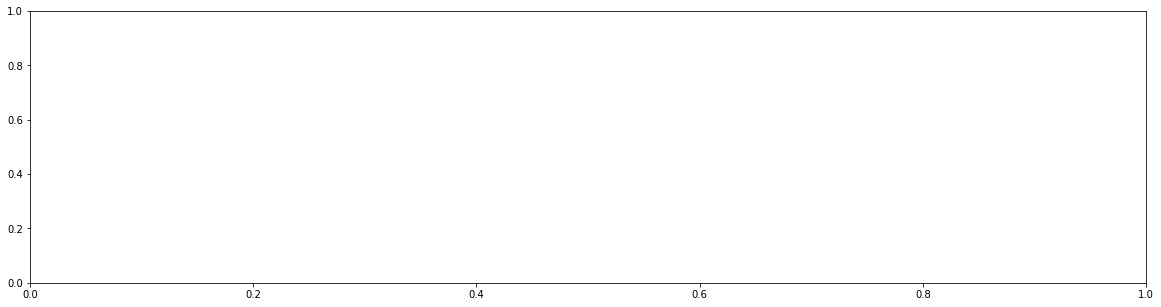

In [28]:
bin_sums = plot_all_distovertime_normalized(data_folder, alldf)

In [29]:
labels = [int(i) for i in alldf.concentration.unique()]
labels.sort()
bin_anova(bin_sums, labels)

ValueError: invalid literal for int() with base 10: '50ugml'

In [ ]:
plt_avgperconc(data_folder, alldf, 'dist')

In [ ]:
plt_avgperconc(data_folder, alldf, 'boutcount')

In [ ]:
plt_avgperconc(data_folder, alldf, 'thigmotaxis_dist')

In [ ]:
plt_avgperconc(data_folder, alldf, 'thigmotaxis_time')

In [ ]:
stimulus = 'left'
stimdf = dataframe[dataframe.stim_name==stimulus]
hist, std, bins = Hist(dataframe, boutframe, stims=[stimulus])

fig, ax = plt.subplots(1,4, figsize=(16,6))

ax[0].set_title(f'Cumulative Theta {stimulus}')
ax[1].set_title(f'Cumulative Theta {stimulus}')

for stim_ind in stimdf.stim_index.unique():
    ind_df = stimdf[stimdf.stim_index==stim_ind]
    try:
        ax[0].plot(ind_df.stim_time.values, ind_df.cum_theta.values)
    except:
        pass

try:
    ax[1].plot(bins[1:], gaussian_filter(hist, sigma=1))
except:
    pass

stimulus = 'right'
stimdf = dataframe[dataframe.stim_name==stimulus]
hist, std, bins = Hist(dataframe, boutframe, stims=[stimulus])

for stim_ind in stimdf.stim_index.unique():
    ind_df = stimdf[stimdf.stim_index==stim_ind]
    try:
        ax[2].plot(ind_df.stim_time.values, ind_df.cum_theta.values)
    except:
        pass

try:
    ax[3].plot(bins[1:], gaussian_filter(hist, sigma=1))
except:
    pass

ax[2].set_title(f'Bout Frequency {stimulus}')
ax[3].set_title(f'Bout Frequency {stimulus}')

ax[0].set_xlim(0,15)
ax[0].set_ylim(-10,10)
ax[2].set_xlim(0,15)
ax[2].set_ylim(-10,10)

ax[1].set_ylim(-5,100)
ax[3].set_ylim(-5,100)

fig.suptitle(f'fish: {3},  rig: {5}')
plt.show()